In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2

In [3]:
dataset = pd.read_csv('Dataset/natalitycombinedps.csv')

In [6]:
f_cols = [col for col in dataset.columns if col.startswith('f_')]
print(f_cols)
print(len(f_cols))

['f_bfacil', 'f_mhisp', 'f_mar_p', 'f_meduc', 'f_fhisp', 'f_feduc', 'f_mpcb', 'f_tpcv', 'f_wic', 'f_cigs_0', 'f_cigs_1', 'f_cigs_2', 'f_cigs_3', 'f_tobaco', 'f_m_ht', 'f_pwgt', 'f_dwgt', 'f_wtgain', 'f_rf_pdiab', 'f_rf_gdiab', 'f_rf_phyper', 'f_rf_ghyper', 'f_rf_eclamp', 'f_rf_ppb', 'f_rf_inft', 'f_rf_inf_drg', 'f_rf_inf_art', 'f_rf_cesar', 'f_rf_ncesar', 'f_ip_gonor', 'f_ip_syph', 'f_ip_chlam', 'f_ip_hepatb', 'f_ip_hepatc', 'f_ob_succ', 'f_ob_fail', 'f_ld_indl', 'f_ld_augm', 'f_ld_ster', 'f_ld_antb', 'f_ld_chor', 'f_ld_anes', 'f_me_pres', 'f_me_rout', 'f_me_trial', 'f_dmeth_rec', 'f_mm_mtr', 'f_mm_', 'f_mm_rupt', 'f_mm_uhyst', 'f_mm_aicu', 'f_pay', 'f_pay_rec', 'f_apgar5', 'f_ab_vent', 'f_ab_vent6', 'f_ab_niuc', 'f_ab_surfac', 'f_ab_antibio', 'f_ab_seiz', 'f_ca_anen', 'f_ca_menin', 'f_ca_heart', 'f_ca_hernia', 'f_ca_ompha', 'f_ca_gastro', 'f_ca_limb', 'f_ca_cleftlp', 'f_ca_cleft', 'f_ca_downs', 'f_ca_chrom', 'f_ca_hypos', 'f_bfed']
73


In [ ]:
cleaned_dataset = dataset.copy()

In [55]:
# cleaned_dataset.drop(columns=f_cols, inplace=True)
cleaned_dataset.shape

(68010, 165)

# “Removal of Newborn Outcome Features to Prevent Data Leakage”

In [56]:
ab_cols = [col for col in dataset.columns if col.startswith('ab_')]
ca_cols = [col for col in dataset.columns if col.startswith('ca_')]

cleaned_dataset = cleaned_dataset.drop(columns=ab_cols + ca_cols)


In [75]:
cleaned_dataset.shape

(68010, 147)

In [17]:
cols = ['combgest',
 'gestrec10',
 'gestrec3',
 'lmpused',
 'oegest_comb',
 'oegest_r10',
 'oegest_r3']
for col in cols:
    print(col, sorted(cleaned_dataset[col].unique()))
    

combgest [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 99]
gestrec10 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 99]
gestrec3 [1, 2, 3]
lmpused [nan]
oegest_comb [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 99]
oegest_r10 [2, 3, 4, 5, 6, 7, 8, 9, 10, 99]
oegest_r3 [1, 2, 3]


In [20]:
cleaned_dataset['combgest'] = cleaned_dataset['combgest'].replace(99, pd.NA)
cleaned_dataset = cleaned_dataset.dropna(subset=['combgest'])
print(cleaned_dataset['combgest'].isnull().sum())

0


# Defining Preterm Target

In [30]:
cleaned_dataset['preterm'] = (cleaned_dataset['combgest']<37).astype(int)

C:\Users\ACER\anaconda3\envs\booksenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
cleaned_dataset['preterm'].value_counts()

0    58295
1     9715
Name: preterm, dtype: int64

# Visuablizing the preterm and not-preterm data

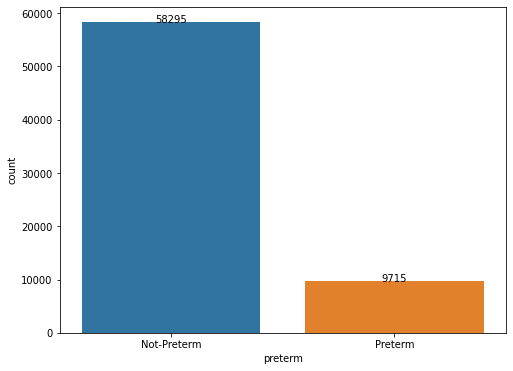

In [76]:
import seaborn as sns
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=cleaned_dataset, x='preterm')
plt.xticks([0, 1], ['Not-Preterm', 'Preterm'])
for p in ax.patches:
    # print(p)
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.5,int(height), ha='center')
plt.savefig('BeforeSplitting.png', dpi=300)
plt.show()

In [33]:
cleaned_dataset.shape

(68010, 165)

In [83]:
# features that could directly define preterm or gestational age
cols_to_drop = ['combgest', 'gestrec3', 'gestrec10', 'oegest_comb', 'oegest_r10', 'oegest_r3', 'obgest_flg', 'compgst_imp']
X = cleaned_dataset.drop(columns=cols_to_drop + ['preterm']).copy() # X = dataset.drop('preterm', axis=1)
y = cleaned_dataset['preterm']
X.shape

(68010, 138)

# Train Test split

In [84]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Visualizing the Preterm vs Not_Preterm in Train and Test

# Using Seaborn

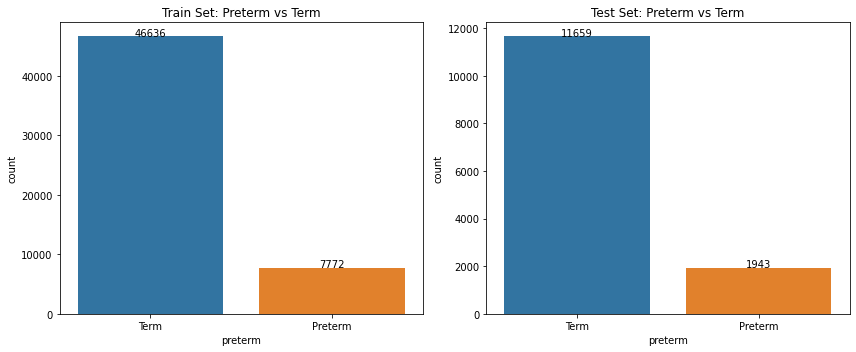

In [85]:
import seaborn as sns
import pandas as pd

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.countplot(x=y_train, ax=axes[0])
axes[0].set_xticks([0,1])
axes[0].set_xticklabels(['Term','Preterm'])
axes[0].set_title('Train Set: Preterm vs Term')
for p in axes[0].patches:
    # print(p)
    height = p.get_height()
    axes[0].text(p.get_x()+p.get_width()/2., height + 0.5,int(height), ha='center')

    

sns.countplot(x=y_test, ax=axes[1])
axes[1].set_xticks([0,1])
axes[1].set_xticklabels(['Term','Preterm'])
axes[1].set_title('Test Set: Preterm vs Term')
for p in axes[1].patches:
    # print(p)
    height = p.get_height()
    axes[1].text(p.get_x()+p.get_width()/2., height + 0.5,int(height), ha='center')
plt.tight_layout()
plt.show()


# Same value columns and more than 80% missing value columns

In [86]:
same_value_cols = [col for col in X_train.columns if X_train[col].nunique()==1]
print("Columns with same value in all rows")
print(same_value_cols)

Columns with same value in all rows
['mage_impflg', 'mraceimp', 'mar_imp', 'imp_plur', 'imp_sex']


In [87]:
missing_80_cols = [col for col in X_train.columns if X_train[col].isnull().mean()>0.8]
print("Columns with more than 80% missing values: ")
print(missing_80_cols)

Columns with more than 80% missing values: 
['mage_impflg', 'mage_repflg', 'mraceimp', 'mar_imp', 'fagerpt_flg', 'imp_plur', 'imp_sex', 'lmpused', 'mrcntry', 'rcity_pop']


# Dropping columns From both Test and Train Data

In [88]:
cols_to_drop = list(set(same_value_cols + missing_80_cols))
X_train = X_train.drop(columns=cols_to_drop)
print(cols_to_drop)
remaining = [col for col in cols_to_drop if col in X_train.columns]
print("Columns still present after deletion (should be empty):")
print(remaining)

print("New Shape", X_train.shape)

['mage_impflg', 'mar_imp', 'imp_sex', 'mage_repflg', 'imp_plur', 'rcity_pop', 'lmpused', 'fagerpt_flg', 'mraceimp', 'mrcntry']
Columns still present after deletion (should be empty):
[]
New Shape (54408, 128)


In [89]:
# X_test = X_test.drop(columns=cols_to_drop)
X_test = X_test.drop(columns=cols_to_drop)
print("New Shape", X_test.shape)

New Shape (13602, 128)


# Numerical columns vs Categorical Columns

In [90]:
print('All shape', X_train.shape)
num_cols = X_train.select_dtypes(include=['number']).columns.tolist()
print(len(num_cols))
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()
print(len(cat_cols))


All shape (54408, 128)
87
41


In [91]:
X_train.isnull().sum()[X_train.isnull().sum()>0]

mbcntry       1
rcnty_pop    73
dtype: int64

In [92]:
binary_cols = [col for col in num_cols if X_train[col].nunique() <= 2]
numeric_cols = [col for col in num_cols if X_train[col].nunique() > 2]
print(cleaned_dataset[binary_cols])
print(len(binary_cols))
print(len(numeric_cols))

       dmar  rectype
0         1        2
1         2        2
2         2        2
3         1        2
4         1        2
...     ...      ...
68108     2        1
68109     1        1
68110     2        1
68111     1        1
68112     1        1

[68010 rows x 2 columns]
2
85


# Drop Redundant Flag (f_) Features with Corresponding Main Columns

In [93]:
X_train.shape

(54408, 128)

In [94]:
corr = X_train[numeric_cols].corr()
corr.shape

(85, 85)

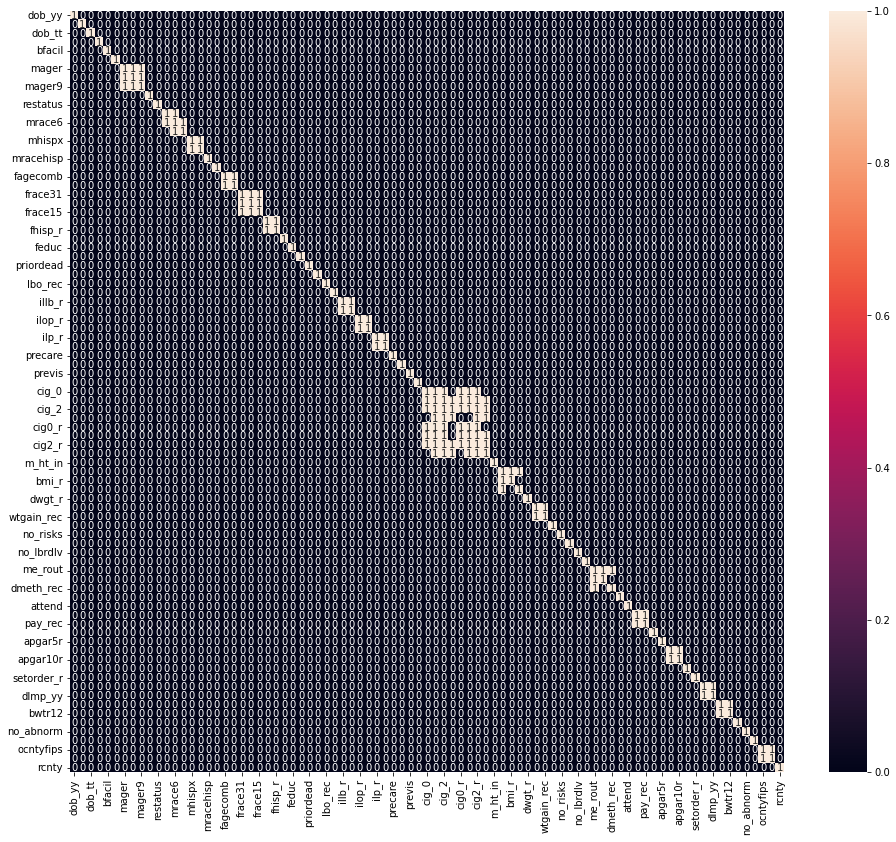

In [95]:
import seaborn as sns
plt.figure(figsize=(16, 14))
sns.heatmap(corr>0.9, annot=True)
plt.savefig('CorrelatedFeatures.png')
plt.show()

# "Remove Highly Correlated Numerical Features (Unique > 2)"

In [96]:
corr_pairs = []
for i in range(len(corr.columns)):
    for j in range(i):
        if corr.iloc[i, j]>0.97:
            corr_pairs.append((corr.columns[i], corr.columns[j], corr.iloc[i,j]))
            
corr_pairs


[('mager9', 'mager', 0.9718199602315704),
 ('mager9', 'mager14', 0.9712654507814591),
 ('mhisp_r', 'mhispx', 0.9981272753825846),
 ('frace15', 'frace31', 0.9981406288744871),
 ('fhisp_r', 'fhispx', 0.9977241297096494),
 ('illb_r11', 'illb_r', 0.9987231740208955),
 ('ilop_r11', 'ilop_r', 0.9992978829630798),
 ('ilp_r11', 'ilp_r', 0.9989923517119145),
 ('cig_1', 'cig_0', 0.9937844108337238),
 ('cig_2', 'cig_0', 0.9936177715071682),
 ('cig_2', 'cig_1', 0.9987986962024713),
 ('cig0_r', 'cig_0', 0.9934161927015898),
 ('cig0_r', 'cig_1', 0.9851205316972458),
 ('cig0_r', 'cig_2', 0.9842360017020102),
 ('cig1_r', 'cig_0', 0.9912197798092942),
 ('cig1_r', 'cig_1', 0.9966062711639901),
 ('cig1_r', 'cig_2', 0.9946428288867314),
 ('cig1_r', 'cig0_r', 0.9891692662405885),
 ('cig2_r', 'cig_0', 0.9918410902339625),
 ('cig2_r', 'cig_1', 0.996298006111373),
 ('cig2_r', 'cig_2', 0.9974102788932708),
 ('cig2_r', 'cig0_r', 0.9877194828144874),
 ('cig2_r', 'cig1_r', 0.9974086245632029),
 ('cig3_r', 'cig_3'

In [97]:
features_to_drop = ['mager9', 'mager14', 'mrace31', 'mrace15', 'wtgain_rec', 'pay_rec', 'bmi_r', 'pwgt_r', 'bwtr12',
                    'ocntyfips', 'cig_0', 'cig_1', 'cig_2', 'cig_3',  'apgar10r', 'rdmeth_rec', 'ilp_r11', 'ilop_r11', 'mhispx',
                   'frace31', 'frace15', 'fagerec11', 'fhispx', 'fhisp_r', 'dmeth_rec', 'illb_r11', 'mhisp_r', 'dbwt']
len(features_to_drop)
# 85-24

28

In [98]:
X_train.drop(columns=features_to_drop, inplace=True)
print(X_train.shape)
X_test.drop(columns = features_to_drop, inplace=True)
print(X_test.shape)

(54408, 100)
(13602, 100)


In [99]:
num_cols = X_train.select_dtypes(include=['number']).columns.tolist()
binary_cols = [col for col in num_cols if X_train[col].nunique() <= 2]
numeric_cols = [col for col in num_cols if X_train[col].nunique() > 2]
print('Numerical colums', len(num_cols))
print('Binary numeric', len(binary_cols))
print('Numeric unique>', len(numeric_cols))

Numerical colums 59
Binary numeric 2
Numeric unique> 57


In [100]:
cat_features = X_train.select_dtypes(include=['object'])
cat_features.nunique()
# print(cat_features.value_counts())

mar_p          4
wic            3
cig_rec        3
rf_pdiab       3
rf_gdiab       3
rf_phype       3
rf_ghype       3
rf_ehype       3
rf_ppterm      3
rf_inftr       3
rf_fedrg       4
rf_artec       4
rf_cesar       3
ip_gon         3
ip_syph        3
ip_chlam       3
ip_hepb        3
ip_hepc        3
ob_ecvs        3
ob_ecvf        3
ld_indl        3
ld_augm        3
ld_ster        3
ld_antb        3
ld_chor        3
ld_anes        3
me_trial       4
mm_mtr         3
mm_plac        3
mm_rupt        3
mm_uhyst       3
mm_aicu        3
mtran          3
sex            2
itran          3
ilive          3
bfed           3
octerr         5
mbcntry      112
mrterr         8
rcnty_pop     13
dtype: int64

# Dropping Irrelevant / foreign features for Nepal



In [101]:
foreign_feature = ['rcnty_pop', 'octerr', 'mrterr', 'mbcntry']
X_train.drop(columns=foreign_feature, inplace=True)
X_train.shape

(54408, 96)

In [102]:

X_test.drop(columns=foreign_feature, inplace=True)
X_test.shape

(13602, 96)

# Applying

In [103]:
le = LabelEncoder()

In [104]:
X_train.isnull().sum()

dob_yy      0
dob_mm      0
dob_tt      0
dob_wk      0
bfacil      0
           ..
ilive       0
bfed        0
ocntypop    0
rcnty       0
rectype     0
Length: 96, dtype: int64

In [105]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
import pandas as pd

# 1. Get categorical columns (object dtype)
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()

# 2. Encode categorical features
le = LabelEncoder()
encoded = pd.DataFrame()

for col in cat_cols:
    encoded[col] = le.fit_transform(X_train[col].astype(str))

# 3. Chi-square test
chi_scores, p_values = chi2(encoded, y_train)

# 4. Combine into DataFrame
chi_df = pd.DataFrame({
    'Feature': cat_cols,
    'Chi2_Score': chi_scores,
    'p_value': p_values
})

# 5. Sort by highest chi2
chi_df = chi_df.sort_values(by='Chi2_Score', ascending=False)

chi_df


,Feature,Chi2_Score,p_value
22,ld_ster,14469.692793,0.000000e+00
34,itran,1715.603660,0.000000e+00
8,rf_ppterm,1528.271823,0.000000e+00
23,ld_antb,1149.669720,5.292598e-252
6,rf_ghype,958.722418,1.685442e-210
26,me_trial,633.088648,1.064318e-139
21,ld_augm,355.745936,2.376344e-79
7,rf_ehype,346.636720,2.288503e-77
20,ld_indl,266.433065,6.797138e-60
5,rf_phype,212.584808,3.749299e-48


In [114]:
len(chi_df)

37

In [ ]:
encoded.head(5)

In [110]:
chi_score_series = pd.Series(chi_scores[0], index=X_train.columns).sort_values(ascending=False)
chi_score_series

rectype      22.268969
rcnty        22.268969
ilp_r        22.268969
precare      22.268969
precare5     22.268969
               ...    
no_lbrdlv    22.268969
me_pres      22.268969
me_rout      22.268969
me_trial     22.268969
dob_yy       22.268969
Length: 96, dtype: float64

In [112]:
p_value_series =  pd.Series(chi_scores[1], index=X_train.columns).sort_values(ascending=False)

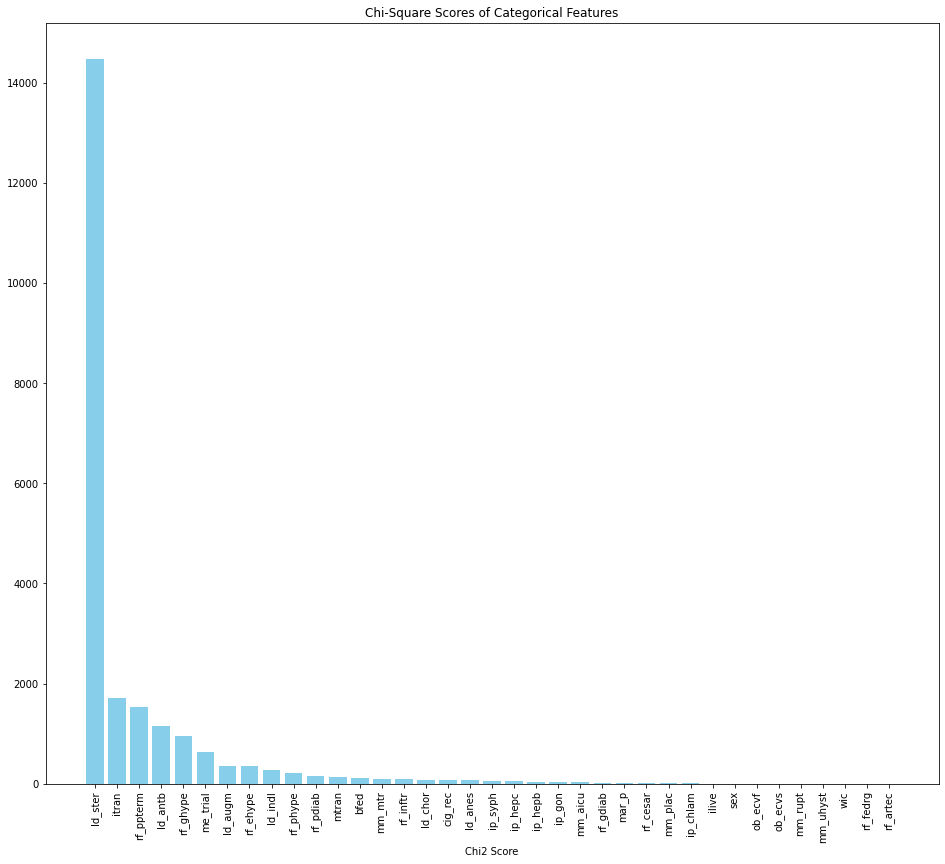

In [113]:
import matplotlib.pyplot as plt

# Suppose chi_df is your DataFrame with 'Feature', 'Chi2_Score', 'p_value'
chi_df_sorted = chi_df.sort_values(by='Chi2_Score', ascending=False)
plt.figure(figsize=(16,14))
plt.bar(chi_df_sorted['Feature'], chi_df_sorted['Chi2_Score'], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Chi2 Score')
plt.title('Chi-Square Scores of Categorical Features')
# plt.gca().invert_yaxis()  # Highest score on top
plt.show()


In [52]:
top_30_features = chi_df_sorted['Feature'].head(30).tolist()

print("Top 30 features based on Chi2:")
print(top_30_features)

Top 30 features based on Chi2:
['ld_ster', 'ab_nicu', 'ab_aven1', 'ab_anti', 'ab_aven6', 'ab_surf', 'itran', 'rf_ppterm', 'ld_antb', 'rf_ghype', 'me_trial', 'ld_augm', 'rf_ehype', 'ld_indl', 'rf_phype', 'rf_pdiab', 'mtran', 'bfed', 'mm_mtr', 'rf_inftr', 'ca_gast', 'ld_chor', 'cig_rec', 'ld_anes', 'ip_syph', 'ip_hepc', 'ab_seiz', 'ca_cdh', 'ip_hepb', 'ca_mnsb']


In [53]:
chi2_df_sorted = chi_df.sort_values(by='Chi2_Score', ascending=True)
least_25_features = chi2_df_sorted['Feature'].head(25).tolist()

X_train.drop(columns=least_25_features, inplace=True)
X_test.drop(columns=least_25_features, inplace=True)
print("Dropped features:")
print(least_25_features)

Dropped features:
['rf_artec', 'rf_fedrg', 'wic', 'ca_down', 'ca_disor', 'mm_uhyst', 'mm_rupt', 'ob_ecvs', 'ob_ecvf', 'sex', 'ilive', 'ip_chlam', 'mm_plac', 'rf_cesar', 'mar_p', 'rf_gdiab', 'ca_clpal', 'mm_aicu', 'ca_cleft', 'ca_omph', 'ca_cchd', 'ca_anen', 'ip_gon', 'ca_limb', 'ca_hypo']


C:\Users\ACER\anaconda3\envs\booksenv\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [54]:
print(X_train.shape)
print(X_test.shape)

(54408, 132)
(13602, 175)


In [60]:
num_cols =X_train.select_dtypes(include=['number']).columns.tolist()
binary_cols = [col for col in num_cols if X_train[col].nunique() <= 2]
numeric_cols = [col for col in num_cols if X_train[col].nunique() > 2]
corr = X_train[binary_cols].corr()
corr_pairs = []
for i in range(len(corr.columns)):
    for j in range(i):
        if corr.iloc[i, j]==1.0:
            corr_pairs.append((corr.columns[i], corr.columns[j], corr.iloc[i,j]))
            
# corr_pairs
binary_cols

['f_mhisp',
 'dmar',
 'f_fhisp',
 'f_mpcb',
 'f_tpcv',
 'f_cigs_0',
 'f_cigs_1',
 'f_cigs_2',
 'f_cigs_3',
 'f_tobaco',
 'f_m_ht',
 'f_pwgt',
 'f_dwgt',
 'f_rf_phyper',
 'f_rf_ghyper',
 'f_rf_eclamp',
 'f_rf_ppb',
 'f_rf_inft',
 'f_rf_inf_drg',
 'f_rf_inf_art',
 'f_rf_ncesar',
 'f_ip_gonor',
 'f_ip_hepatb',
 'f_ip_hepatc',
 'f_ob_succ',
 'f_ob_fail',
 'f_mm_',
 'f_ab_vent',
 'f_ab_vent6',
 'f_ab_niuc',
 'f_ab_surfac',
 'f_ab_antibio',
 'f_ca_menin',
 'f_ca_heart',
 'f_ca_hernia',
 'f_ca_ompha',
 'f_ca_gastro',
 'f_ca_cleftlp',
 'f_ca_downs',
 'f_ca_chrom',
 'f_ca_hypos',
 'rectype']

In [66]:
flag_cols = [col for col in X_train.columns if col.startswith('f_')]
print(flag_cols)
# for col in flag_cols:
#     print(col, X_train[col].unique())
#     print(col, X_train[col].value_counts())
X_train = X_train.drop(columns=flag_cols)
X_test = X_test.drop(columns=flag_cols)
print(X_train.shape)
print(X_test.shape)


['f_mhisp', 'f_fhisp', 'f_mpcb', 'f_tpcv', 'f_cigs_0', 'f_cigs_1', 'f_cigs_2', 'f_cigs_3', 'f_tobaco', 'f_m_ht', 'f_pwgt', 'f_dwgt', 'f_rf_phyper', 'f_rf_ghyper', 'f_rf_eclamp', 'f_rf_ppb', 'f_rf_inft', 'f_rf_inf_drg', 'f_rf_inf_art', 'f_rf_ncesar', 'f_ip_gonor', 'f_ip_hepatb', 'f_ip_hepatc', 'f_ob_succ', 'f_ob_fail', 'f_mm_', 'f_ab_vent', 'f_ab_vent6', 'f_ab_niuc', 'f_ab_surfac', 'f_ab_antibio', 'f_ca_menin', 'f_ca_heart', 'f_ca_hernia', 'f_ca_ompha', 'f_ca_gastro', 'f_ca_cleftlp', 'f_ca_downs', 'f_ca_chrom', 'f_ca_hypos']
(54408, 92)
(13602, 135)


In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [73]:
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()
num_cols = X_train.select_dtypes(include=['number']).columns.tolist()
print(len(cat_cols))
print(len(num_cols))

30
62


In [77]:

X_train_num = X_train[num_cols].copy()
X_test_num = X_test[num_cols].copy()
X_train_cat_encoded = X_train[cat_cols].apply(lambda col: col.astype('category').cat.codes)
X_test_cat_encoded = X_test[cat_cols].apply(lambda col: col.astype('category').cat.codes)

X_train_rfe = pd.concat([X_train_num, X_train_cat_encoded], axis=1)
X_test_rfe = pd.concat([X_test_num, X_test_cat_encoded], axis=1)

dt = DecisionTreeClassifier(random_state=42)
n_features_to_select = 45
rfe_selector = RFE(estimator=dt, n_features_to_select=n_features_to_select, step=4, verbose=1)

rfe_selector.fit(X_train_rfe, y_train)

selected_features_rfe = X_train_rfe.columns[rfe_selector.support_].tolist()
print(f"Top {n_features_to_select} features selected by RFE:")
print(selected_features_rfe)

X_train_selected = X_train_rfe[selected_features_rfe]
X_test_selected = X_test_rfe[selected_features_rfe]

Fitting estimator with 92 features.
Fitting estimator with 88 features.
Fitting estimator with 84 features.
Fitting estimator with 80 features.
Fitting estimator with 76 features.
Fitting estimator with 72 features.
Fitting estimator with 68 features.
Fitting estimator with 64 features.
Fitting estimator with 60 features.
Fitting estimator with 56 features.
Fitting estimator with 52 features.
Fitting estimator with 48 features.
Top 45 features selected by RFE:
['dob_yy', 'dob_mm', 'dob_tt', 'dob_wk', 'mager', 'restatus', 'mrace6', 'dmar', 'meduc', 'fagecomb', 'frace6', 'fhisp_r', 'fracehisp', 'feduc', 'priorlive', 'priorterm', 'lbo_rec', 'tbo_rec', 'illb_r', 'ilop_r', 'ilp_r', 'precare', 'precare5', 'previs', 'previs_rec', 'm_ht_in', 'bmi', 'dwgt_r', 'wtgain', 'no_risks', 'me_pres', 'me_rout', 'pay', 'apgar5', 'dlmp_mm', 'dlmp_yy', 'dbwt', 'no_abnorm', 'ocntypop', 'rcnty', 'ld_augm', 'ld_ster', 'ld_antb', 'me_trial', 'ab_nicu']


In [80]:
corr = X_train[selected_features_rfe].corr()
corr_pairs = []
for i in range(len(corr.columns)):
    for j in range(i):
        if corr.iloc[i, j]>0.8:
            corr_pairs.append((corr.columns[i], corr.columns[j], corr.iloc[i,j]))
            
corr_pairs


[('tbo_rec', 'lbo_rec', 0.8260521985821964),
 ('ilp_r', 'illb_r', 0.8366546128214764),
 ('dlmp_yy', 'dlmp_mm', 0.9766689175191937)]

In [82]:
# for i in selected_features_rfe:
#     print(i, X_train[i].value_counts())

In [83]:
# Assuming 'selected_features' is a list of 45 important features
important_features = selected_features_rfe  # your 45 features

# Subset the original dataframe
X_important = X_train[important_features]
X_important['target'] = y_train  # add target if needed

# Save to CSV
X_important.to_csv('important_features.csv', index=False)


C:\Users\ACER\anaconda3\envs\booksenv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [84]:
dataset['preterm']

0        0
1        0
2        0
3        0
4        1
        ..
68108    0
68109    0
68110    0
68111    0
68112    0
Name: preterm, Length: 68010, dtype: int32

In [85]:
# Add the target column to the selected features
important_features = selected_features_rfe + ['preterm']  # include target
X_selected = dataset[important_features]

# Save to CSV
X_selected.to_csv('final_important_features.csv', index=False)
